In [2]:
import matplotlib.pyplot as plt
import numpy as np
import traceback

In [3]:
# Goal: Build and understand Computational graphs and backpropagate through them
# Graphs? Aren't they just binary trees with root node?

In [4]:
class Value:
    def __init__(self, data, _children=(), _op="", _name="", _self_initialized=False):
        self.data = data
        self._prev = list(_children)
        self._op = _op
        self._name = str(data)
        if _name: self._name = _name
        if not _self_initialized:
            (_, _, _, _name) = traceback.extract_stack()[-2]
            self._name = _name.split('=')[0].strip()

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+', \
                     _name=f'({self._name} + {other._name})', _self_initialized=True)

    def __sub__(self, other):
        return Value(self.data - other.data, (self, other), '-', \
                     _name=f'({self._name} - {other._name})', _self_initialized=True)
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*', \
                     _name=f'({self._name} * {other._name})', _self_initialized=True)
    
    def __div__(self, other):
        return Value(self.data / other.data, (self, other), '/', \
                     _name=f'({self._name} / {other._name})', _self_initialized=True)
    
    def __pow__(self, other):
        return Value(self.data ** other.data, (self, other), '**', \
                     _name=f'({self._name} ** {other._name})', _self_initialized=True)

# A random Mathematical expression
# Note: traceback.extrack_stack doesn't work with instance like d=a*Value(5)
a = Value(4.0)
b = Value(3.5)
p = Value(2.0)
root = (a**p + b**p) - a*b
root

Value(data=14.25)

In [5]:
# Breadth first traversal?
def traverse(root):
    done = list()
    def recurse(node):
        cd = [recurse(child) for child in node._prev]
        if not cd or node in done: return [node]
        done.append(node)
        return [node, cd]
    return recurse(root)
tree = traverse(root)
"""
        d=-15
         /\
     c=-3  5
      /\
    a=4,b=-7
"""
print(tree)

[Value(data=14.25), [[Value(data=28.25), [[Value(data=16.0), [[Value(data=4.0)], [Value(data=2.0)]]], [Value(data=12.25), [[Value(data=3.5)], [Value(data=2.0)]]]]], [Value(data=14.0), [[Value(data=4.0)], [Value(data=3.5)]]]]]


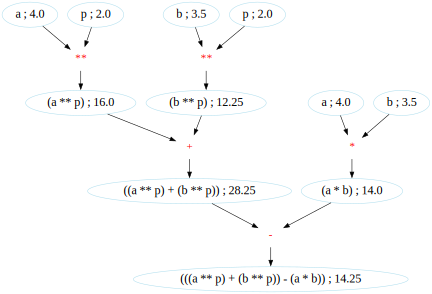

In [6]:
def computational_graph(tree):
    import graphviz
    d = graphviz.Digraph(node_attr={'color': 'lightblue2'})
    d.attr(size='6,6')
    def add_nodes(t_tree, parent_id=None):
        if isinstance(t_tree, list) and len(t_tree) > 1:
            op_id, parent_id_2, child1_id, child2_id = [str(n) for n in np.random.ranf(4)]
            if not parent_id: parent_id = parent_id_2

            d.attr('node', color='white', fontsize='20', fontcolor='red')
            d.node(op_id, label=t_tree[0]._op)
            d.attr('node', color='lightblue2', fontsize='22',\
                   fontcolor='black')

            d.node(parent_id, label=f"{t_tree[0]._name} ; {t_tree[0].data}")
            d.node(child1_id, label=f"{t_tree[1][0][0]._name} ; {t_tree[1][0][0].data}")
            d.node(child2_id, label=f"{t_tree[1][1][0]._name} ; {t_tree[1][1][0].data}")
            d.edge(op_id, parent_id)
            d.edge(child1_id, op_id)
            d.edge(child2_id, op_id)

            add_nodes(t_tree[1][0], child1_id)
            add_nodes(t_tree[1][1], child2_id)
    add_nodes(tree)
    return d
computational_graph(tree)

In [9]:
!pip install jupyterlab-vim